<br>

## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
train_origin = pd.read_csv('train.csv', index_col=0)
train = pd.read_csv('train_x_0.2_99.8.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)

# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train_origin['type_num'] = train_origin['type'].apply(lambda x : to_number(x, column_number))

# 모델에 적용할 데이터 셋 준비 
x = train
y = train_origin['type_num']

x = x.drop(columns=['fiberID'], axis=1)
test_x = test.drop(columns=['fiberID'],axis=1)

col_name = x.columns

x = np.array(x)
x = x.astype('float32')

y = np.array(y)

test_x = np.array(test_x)
test_x = test_x.astype('float32')

from sklearn.model_selection import train_test_split, KFold
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    train_size=0.7, 
                                                    shuffle=True ,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()

scaler2.fit(x_train)
x_train = scaler2.transform(x_train)
x_test = scaler2.transform(x_test)

test_x = scaler2.transform(test_x)

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
Using TensorFlow backend.


<br>

## 모델링

In [2]:
# 모델링
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from keras.initializers import he_normal
from keras.optimizers import adam

num_classes = 19

model=Sequential()

model.add(Dense(64,input_shape=(20, ))) # input dimension
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
# model.add(Dense(128, kernel_initializer=, kernel_regularizer=l2(0.01), bias_regularizer= l2(0.01), bias_initializer=))
# model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.1))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [3]:
# Optimizer의 파라미터 변경
optimizer_adam = adam(lr=0.001, clipvalue=1.0, decay=1e-8/50)

# 모델 훈련
model.compile(loss='categorical_crossentropy', optimizer= optimizer_adam, metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=38, epochs=50, verbose=2,validation_split=0.25)
loss, acc = model.evaluate(x_test,y_test,batch_size=64)
print('Loss:',loss,'Accuracy:',acc)

Train on 104994 samples, validate on 34999 samples
Epoch 1/50
 - 7s - loss: 0.7172 - accuracy: 0.7724 - val_loss: 0.5099 - val_accuracy: 0.8287
Epoch 2/50
 - 7s - loss: 0.5521 - accuracy: 0.8193 - val_loss: 0.4686 - val_accuracy: 0.8387
Epoch 3/50
 - 7s - loss: 0.5239 - accuracy: 0.8259 - val_loss: 0.4501 - val_accuracy: 0.8456
Epoch 4/50
 - 7s - loss: 0.5074 - accuracy: 0.8301 - val_loss: 0.4530 - val_accuracy: 0.8454
Epoch 5/50
 - 7s - loss: 0.4993 - accuracy: 0.8328 - val_loss: 0.4477 - val_accuracy: 0.8459
Epoch 6/50
 - 7s - loss: 0.4907 - accuracy: 0.8350 - val_loss: 0.4382 - val_accuracy: 0.8518
Epoch 7/50
 - 7s - loss: 0.4865 - accuracy: 0.8368 - val_loss: 0.4360 - val_accuracy: 0.8523
Epoch 8/50
 - 7s - loss: 0.4814 - accuracy: 0.8386 - val_loss: 0.4397 - val_accuracy: 0.8489
Epoch 9/50
 - 7s - loss: 0.4755 - accuracy: 0.8397 - val_loss: 0.4561 - val_accuracy: 0.8461
Epoch 10/50
 - 7s - loss: 0.4742 - accuracy: 0.8406 - val_loss: 0.4356 - val_accuracy: 0.8495
Epoch 11/50
 - 7s 

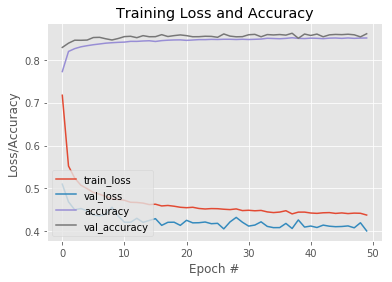

In [4]:
# 학습결과 시각화 

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()